In [1]:
from code.io.EventProcessor import EventProcessor
from code.io.TrackingProcessor import TrackingProcessor
from code.io.PossessionProcessor import PossessionProcessor
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = r'C:\FFmpeg\bin\ffmpeg.exe'

GAME_ID = "0022300451"

event_df = EventProcessor.load_game(GAME_ID)
tracking_df = TrackingProcessor.load_game(GAME_ID)
possessions_df = PossessionProcessor.load_game(GAME_ID)

In [2]:
transition_events = EventProcessor.extract_transition_opportunities(event_df)
event = transition_events[0]
start, end = EventProcessor.get_start_end_time_of_event(event)
moment_df = TrackingProcessor.extract_moment_from_timestamps(tracking_df, start, end)

In [3]:
from code.util.FeatureUtil import FeatureUtil

possession = PossessionProcessor.extract_possesion_by_timestamp(possessions_df, start)
print(start)
print(possession)
FeatureUtil.find_closest_defenders(moment_df, event.iloc[0]["teamId"], start)

          gameId  period                                possId  possNum  \
1607  0022300451       1  5fda4845-bf9b-5709-ad2f-e6a9f6dc16fa        6   
1608  0022300451       1  062a0f44-7a6b-599d-89e7-4b70408d7ae4        5   

          teamId teamAbbr outcome  ptsScored        wcStart          wcEnd  \
1607  1610612752      NYK     FGX          0  1704139962840  1704139969720   
1608  1610612750      MIN     FGX          0  1704139950320  1704139962840   

      gcStart   gcEnd  basketX  
1607   630.36  623.48   -41.75  
1608   638.00  630.36    41.75  


,off_player_id,closest_defender_id,distance
0,1628978,203497,10.640719
1,1628973,203497,10.640719
2,1628392,203497,10.640719
3,203944,203497,10.640719
4,1628384,203497,10.640719


ValueError: Can only compare identically-labeled Series objects

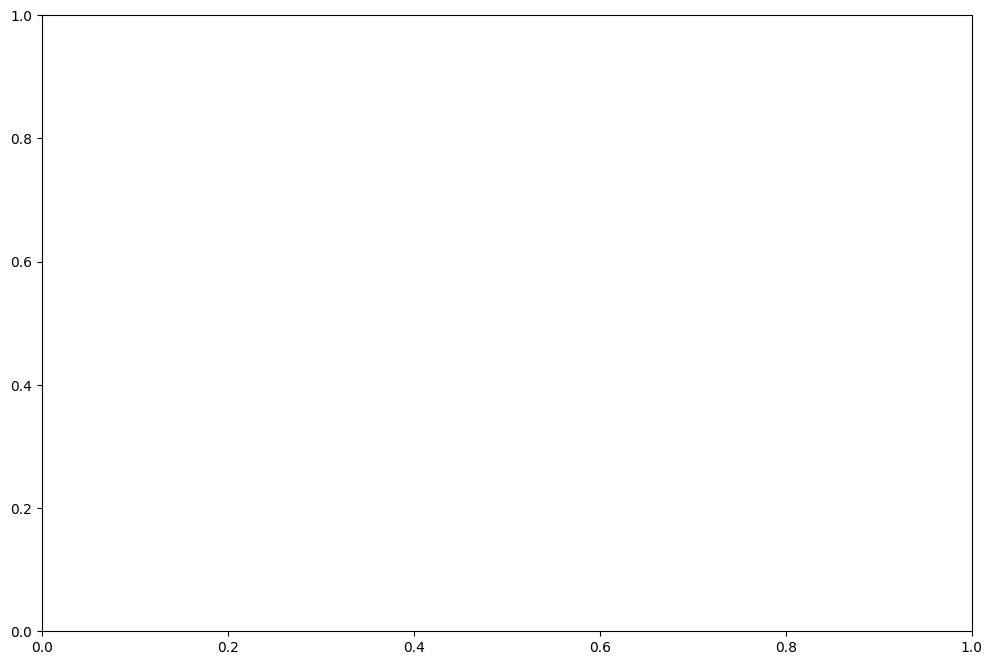

In [4]:
from code.util.AnimationUtil import AnimationUtil

anim = AnimationUtil(tracking_df)
anim.display_animation(possession)